<a href="https://colab.research.google.com/github/IceikSky/NM/blob/main/%D0%9F%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B0_%D1%80%D0%BE%D0%B1%D0%BE%D1%82%D0%B0_%D0%93%D1%80%D0%B8%D0%B3%D0%BE%D1%80%D0%B8%D1%88%D0%B5%D0%BD_%D0%92%D0%BB%D0%B0%D0%B4%D0%B8%D1%81%D0%BB%D0%B0%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Підсумкова робота
Григоришен Владислав**

 Інтерполяційний багаточлен

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, expand


x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y=np.array([0.0, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])
x1 = 0 # точка, в якій потрібно обчислити значення
x2 = 0.2
x3 = 0.5
x4 = 0.9
def lagrange_interpolation(x, y, x_test):
    n = len(x)
    p = np.zeros(n) # масив для зберігання значень багаточленів L_i
    for i in range(n):
        # обчислюємо багаточлен L_i, який складається з n членів
        # кожен член дорівнює  (x-x_j)/(x_i-x_j) для j=0..n, j!=i
        p_i = 1
        for j in range(n):
            if i != j:
                p_i *= (x_test - x[j])/(x[i] - x[j])
        p[i] = p_i
    return np.dot(y, p) # повертаємо значення багаточлена

# обчислюємо інтерполяційний багаточлен та його значення у точці x_test
f1 = lagrange_interpolation(x, y, x1)
print("Значення функції у точці x_1 =", f1.round(4))

f2 = lagrange_interpolation(x, y, x2)
print("Значення функції у точці x_2 =", f2.round(4))

f3 = lagrange_interpolation(x, y, x3)
print("Значення функції у точці x_3 =", f3.round(4))

f4 = lagrange_interpolation(x, y, x4)
print("Значення функції у точці x_4 =", f4.round(4))

Значення функції у точці x_1 = 0.0
Значення функції у точці x_2 = 0.1823
Значення функції у точці x_3 = 0.4055
Значення функції у точці x_4 = 0.6419


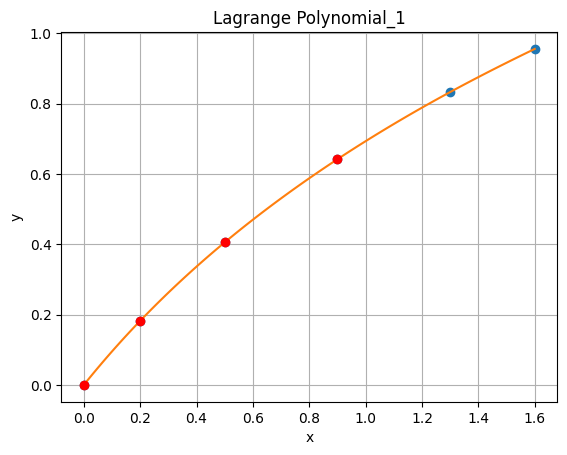

In [50]:
xnew=np.linspace(np.min(x),np.max(x),100) #точки, за якими будуємо графік
ynew=[lagrange_interpolation(x,y,i) for i in xnew]

plt.plot(x,y,'o',xnew,ynew) #будуємо графік функції Лагранжа

plt.plot(x1,f1,'ro')
plt.plot(x2,f2,'ro')
plt.plot(x3,f3,'ro')
plt.plot(x4,f4,'ro')


plt.xlabel('x')
plt.ylabel('y')

plt.title('Lagrange Polynomial_1')
plt.grid(True)
plt.show()

Інтерполяційний багаточлен Ньютона

In [51]:
import numpy as np

# Таблиця значень функції
x_values = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y_values = np.array([0.0, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

# Крок таблиці
h = x_values[1] - x_values[0]

# Обчислення кінцевих різниць
def finite_differences(y):
    n = len(y)
    delta_y = np.zeros((n, n))
    delta_y[:, 0] = y

    for j in range(1, n):
        for i in range(n - j):
            delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j - 1]

    return delta_y

# Отримуємо таблицю кінцевих різниць
delta_table = finite_differences(y_values)

# Виводимо таблицю кінцевих різниць для наочності
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)

# Значення кінцевих різниць для першої та другої похідних
delta_y1 = delta_table[3, 1]  # Δy1
delta2_y1 = delta_table[3, 2]  # Δ²y1
delta3_y1 = delta_table[3, 3]  # Δ³y1
delta4_y1 = delta_table[3, 4]  # Δ⁴y1

# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h):
    return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1 / 4) / h

# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
    return (delta2_y1 - delta3_y1  + 11*delta4_y1 / 12) / h**2


y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1, delta4_y1, h)

# Округляємо до точності 0.001
y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)

# Виводимо результати
print(f"\nПерша похідна y' ≈ {y1_prime}")
print(f"Друга похідна y'' ≈ {y1_double_prime}")

Таблиця кінцевих різниць:
[[ 0.      0.1823  0.0408 -0.0276 -0.031   0.0665]
 [ 0.1823  0.2231  0.0132 -0.0586  0.0355  0.    ]
 [ 0.4055  0.2364 -0.0453 -0.0231  0.      0.    ]
 [ 0.6419  0.1911 -0.0685  0.      0.      0.    ]
 [ 0.8329  0.1226  0.      0.      0.      0.    ]
 [ 0.9555  0.      0.      0.      0.      0.    ]]

Перша похідна y' ≈ 1.126
Друга похідна y'' ≈ -1.711


In [52]:
import numpy as np

# Таблиця значень функції
x_values = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y_values = np.array([0.0, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])
# Крок таблиці
h = x_values[1] - x_values[0]

# Обчислення кінцевих різниць
# Перша похідна
first_derivative = (y_values[1:] - y_values[:-1]) / h

# Друга похідна
second_derivative = (first_derivative[1:] - first_derivative[:-1]) / h

# Виведення результатів
print("Перша похідна:")
print(round(first_derivative[3],3))

print("Друга похідна:")
print(round(second_derivative[3], 3))

Перша похідна:
0.955
Друга похідна:
-1.711


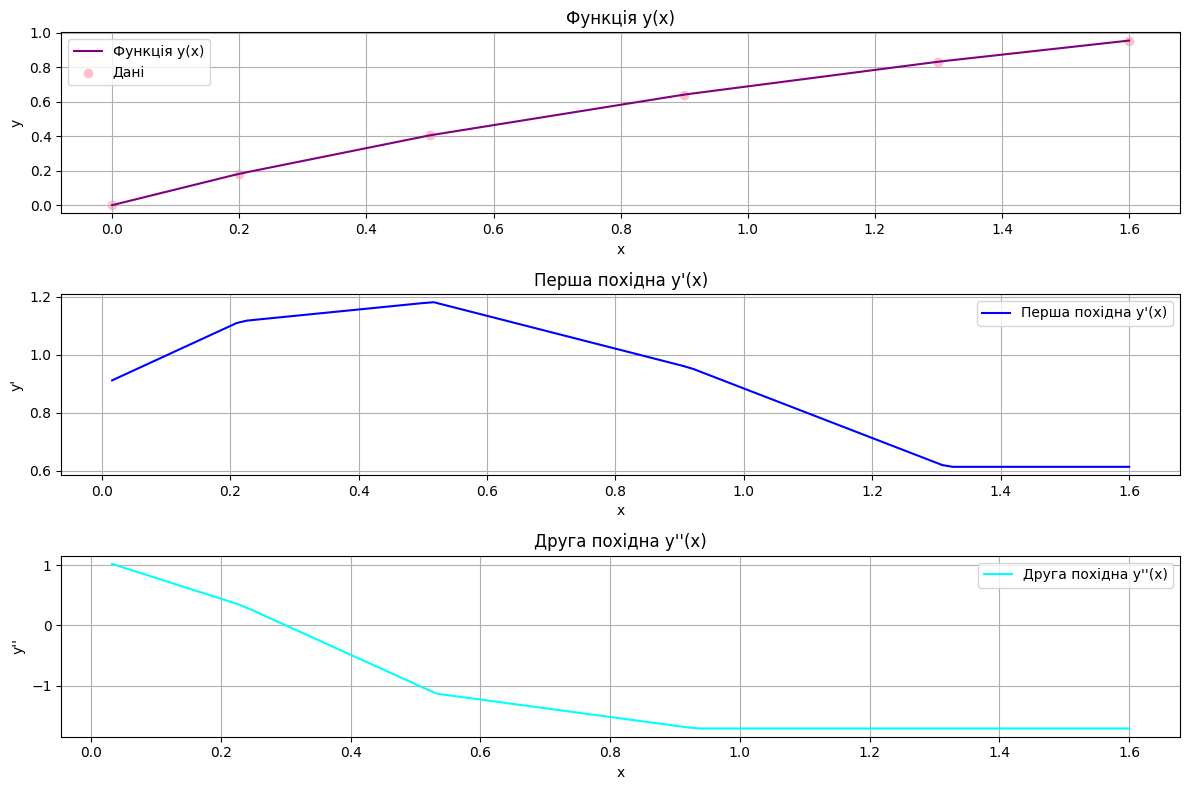

In [53]:
import matplotlib.pyplot as plt

# Інтерполяція значень для побудови графіків
x_fine = np.linspace(x_values[0], x_values[-1], 100)
y_fine = np.interp(x_fine, x_values, y_values)

# Обчислення першої та другої похідної для нових точок
first_deriv_fine = np.interp(x_fine[:-1], x_values[:-1], first_derivative)
second_deriv_fine = np.interp(x_fine[:-2], x_values[:-2], second_derivative)

# Створюємо графіки
plt.figure(figsize=(12, 8))

# Графік функції
plt.subplot(3, 1, 1)
plt.plot(x_fine, y_fine, label='Функція y(x)', color='purple')
plt.scatter(x_values, y_values, color='pink', label='Дані')
plt.title('Функція y(x)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

# Графік першої похідної
plt.subplot(3, 1, 2)
plt.plot(x_fine[1:], first_deriv_fine, label="Перша похідна y'(x)", color='blue')
plt.title("Перша похідна y'(x)")
plt.xlabel('x')
plt.ylabel("y'")
plt.legend()
plt.grid(True)

# Графік другої похідної
plt.subplot(3, 1, 3)
plt.plot(x_fine[2:], second_deriv_fine, label="Друга похідна y''(x)", color='cyan')
plt.title("Друга похідна y''(x)")
plt.xlabel('x')
plt.ylabel("y''")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

Ряд Тейлора 3-го порядку

f'(x) = 0.0075*x**4 - 0.0932*x**3 + 0.4284*x**2 - 0.7322*x + 0.8357
f''(x) = 0.03*x**3 - 0.2796*x**2 + 0.8568*x - 0.7322
f'''(x) = 0.09*x**2 - 0.5592*x + 0.8568
f''''(x) = 0.18*x - 0.5592
f(0) = 0
T(x) = 0.1428*x**3 - 0.3661*x**2 + 0.8357*x


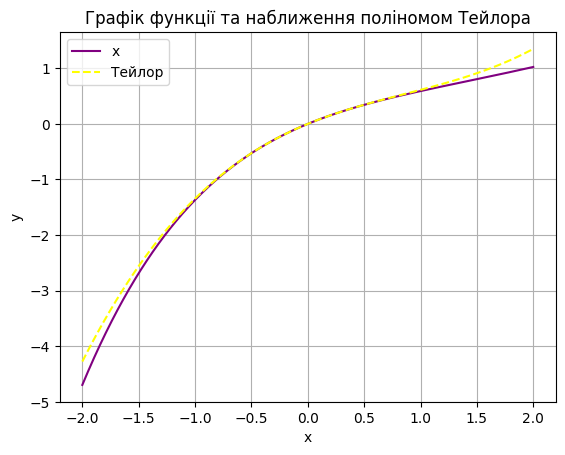

In [54]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Задаємо символьну змінну x та функцію f(x)
x = sp.symbols('x')
#f = x * sp.sin(x)
f = 0.0015 * x**5 - 0.0233 * x**4 + 0.1428 * x**3 - 0.3661 * x**2 + 0.8357 * x

# Знаходимо перші три похідні
f1 = sp.diff(f, x)
f2 = sp.diff(f1, x)
f3 = sp.diff(f2, x)
f4 = sp.diff(f3, x)

# Виводимо похідні
print("f'(x) =", f1)
print("f''(x) =", f2)
print("f'''(x) =", f3)
print("f''''(x) =", f4)

# Знаходимо значення функції та її похідних в точці x=0
x0 = 0
f_x0 = f.subs(x, x0).evalf()
f1_x0 = f1.subs(x, x0).evalf()
f2_x0 = f2.subs(x, x0).evalf()
f3_x0 = f3.subs(x, x0).evalf()

# Обчислюємо значення полінома Тейлора в точці x=0
T = f_x0 + f1_x0*(x-x0) + (f2_x0/2)*(x-x0)**2 + (f3_x0/6)*(x-x0)**3

# Виводимо значення функції та її наближення за поліномом Тейлора в точці x=0
print("f(0) =", f_x0.round(3))
print("T(x) =",T.evalf())

# Будуємо графіки
x_vals = np.linspace(-2, 2, 1000)
f_vals = np.array([f.subs(x, xi).evalf() for xi in x_vals])
T_vals = np.array([T.subs(x, xi).evalf() for xi in x_vals])

fig, ax = plt.subplots()
ax.plot(x_vals, f_vals, label='x', color='purple')
ax.plot(x_vals, T_vals, label='Тейлор', color='yellow', linestyle='--')
ax.legend()
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("Графік функції та наближення поліномом Тейлора")
plt.grid(True)
plt.show()

Кубічний сплайн

In [55]:
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt


x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y = np.array([0.0, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

n = len(x) - 1
h = np.diff(x)
a = y
b = np.zeros(n)
d = np.zeros(n)
c = np.zeros(n + 1)  # Розширюємо на один елемент для останнього індексу c[n]

alpha = np.zeros(n)
for i in range(1, n):
    alpha[i] = (3 / h[i]) * (a[i+1] - a[i]) - (3 / h[i-1]) * (a[i] - a[i-1])

l = np.ones(n + 1)  # Розширюємо l на один елемент
mu = np.zeros(n)
z = np.zeros(n + 1)  # Розширюємо на один елемент

# Пряма хода для знаходження l, mu, z
for i in range(1, n):
    l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
    mu[i] = h[i] / l[i]
    z[i] = (alpha[i] - h[i-1] * z[i-1]) / l[i]

# Крайова умова: c[n] = 0
l[n] = 1
z[n] = 0
c[n] = 0

# Зворотний хід для знаходження c, b, d
for j in range(n-1, -1, -1):
    c[j] = z[j] - mu[j] * c[j+1]
    b[j] = (a[j+1] - a[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
    d[j] = (c[j+1] - c[j]) / (3 * h[j])

# Виведення аналітичного вигляду кубічного сплайну для кожного відрізка
for i in range(n):
    print(f"Відрізок {i+1}:")
    print(f"S_{i}(x) = {a[i]} + {b[i].round(4)}(x - {x[i]}) + {c[i].round(4)}(x - {x[i]})^2 + {d[i].round(4)}(x - {x[i]})^3, x належить [{x[i]}, {x[i+1]}]")

Відрізок 1:
S_0(x) = 0.0 + 0.9413(x - 0.0) + 0.0(x - 0.0)^2 + -0.7426(x - 0.0)^3, x належить [0.0, 0.2]
Відрізок 2:
S_1(x) = 0.182322 + 0.8522(x - 0.2) + -0.4455(x - 0.2)^2 + 0.2808(x - 0.2)^3, x належить [0.2, 0.5]
Відрізок 3:
S_2(x) = 0.405465 + 0.6607(x - 0.5) + -0.1929(x - 0.5)^2 + 0.0464(x - 0.5)^3, x належить [0.5, 0.9]
Відрізок 4:
S_3(x) = 0.641854 + 0.5287(x - 0.9) + -0.1371(x - 0.9)^2 + 0.0238(x - 0.9)^3, x належить [0.9, 1.3]
Відрізок 5:
S_4(x) = 0.832909 + 0.4304(x - 1.3) + -0.1086(x - 1.3)^2 + 0.1207(x - 1.3)^3, x належить [1.3, 1.6]


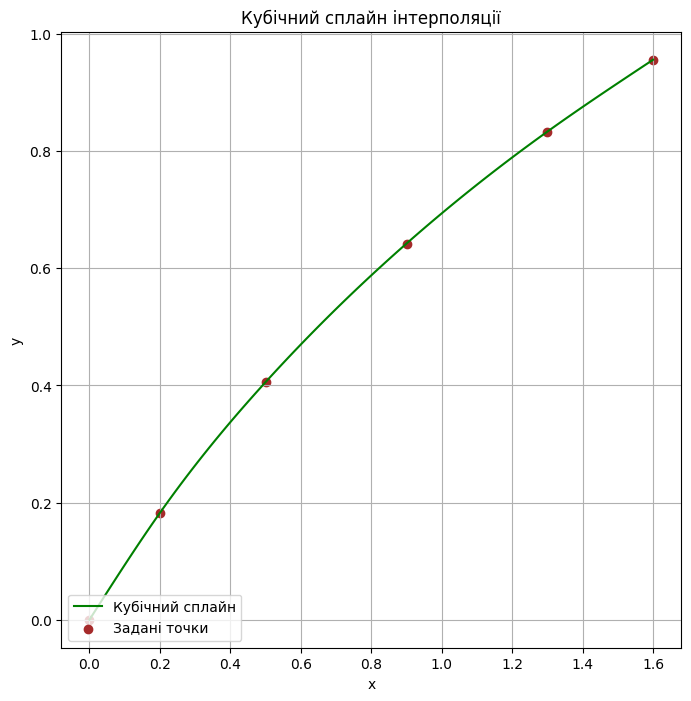

In [56]:
# Побудова графіка
x_values = np.linspace(np.min(x), np.max(x), 100)  # Діапазон для побудови графіка
y_values = [ ]# Значення сплайна

# Обчислення значень сплайна для кожного відрізка
for i in range(n):
    mask = (x_values >= x[i]) & (x_values <= x[i + 1])
    x_interval = x_values[mask]
    y_interval = a[i] + b[i] * (x_interval - x[i]) + c[i] * (x_interval - x[i]) ** 2 + d[i] * (x_interval - x[i]) ** 3
    y_values.extend(y_interval)

# Побудова графіка
plt.figure(figsize=(8, 8))
plt.plot(x_values, y_values, label="Кубічний сплайн", color='green')
plt.scatter(x, y, label="Задані точки", color='brown')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc= 'lower left')
plt.grid()
plt.title("Кубічний сплайн інтерполяції")
plt.show()